<a href="https://colab.research.google.com/github/sallape/AI-Public/blob/main/LinearRegression_Insurance_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  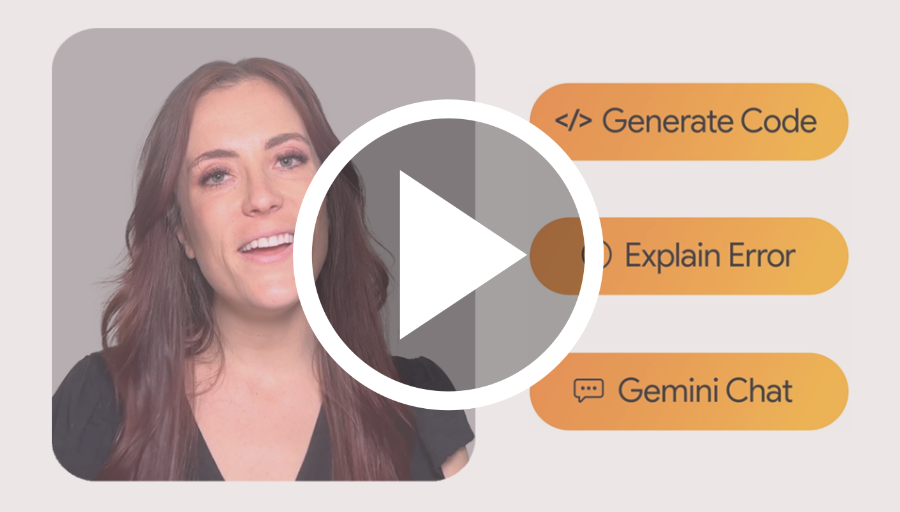
  </a>
</center>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Intellipaat/LinearRegression/new_insurance_data.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [6]:
data.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [7]:
data.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [9]:
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1287 non-null   float64
 1   sex                              1287 non-null   object 
 2   bmi                              1287 non-null   float64
 3   children                         1287 non-null   float64
 4   smoker                           1287 non-null   object 
 5   Claim_Amount                     1287 non-null   float64
 6   past_consultations               1287 non-null   float64
 7   num_of_steps                     1287 non-null   float64
 8   Hospital_expenditure             1287 non-null   float64
 9   NUmber_of_past_hospitalizations  1287 non-null   float64
 10  Anual_Salary                     1287 non-null   float64
 11  region                           1287 non-null   object 
 12  charges                  

In [11]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
Claim_Amount,0
past_consultations,0
num_of_steps,0
Hospital_expenditure,0
NUmber_of_past_hospitalizations,0


In [12]:
data.shape

(1287, 13)

In [13]:
def box_plot_data(data):
  for i in data.columns:
    if data[i].dtype != 'object':
      sns.boxplot(data=data,x=i)
      plt.xlabel(i)
      plt.title(i)
      plt.show()


In [14]:
data_back = data

In [15]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [16]:
out_lier_col = ['bmi', 'past_consultations','Hospital_expenditure','Anual_Salary','charges']

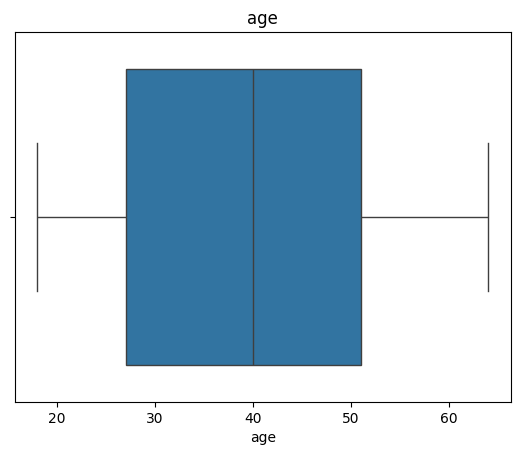

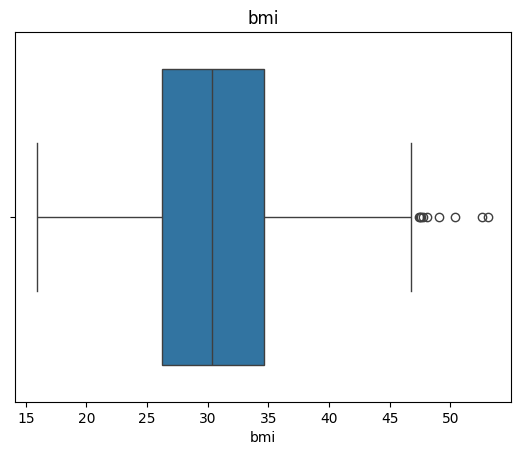

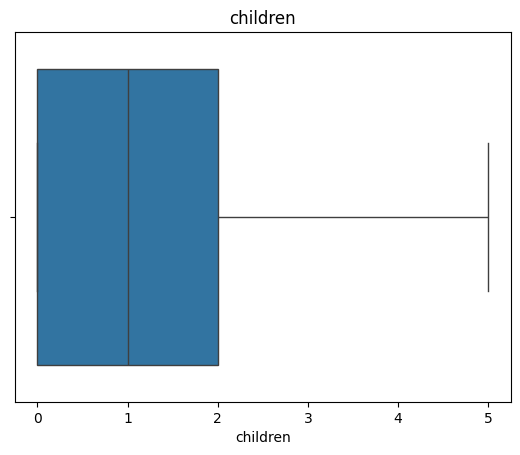

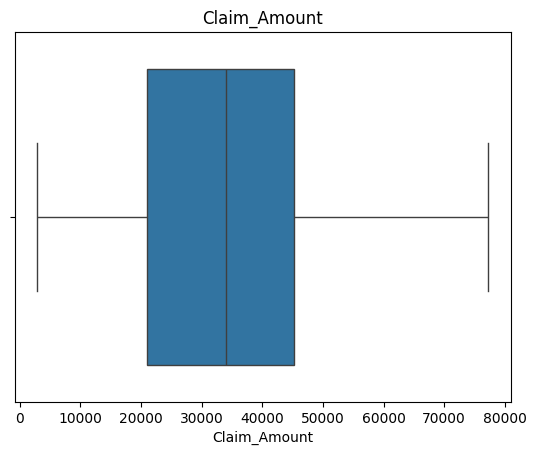

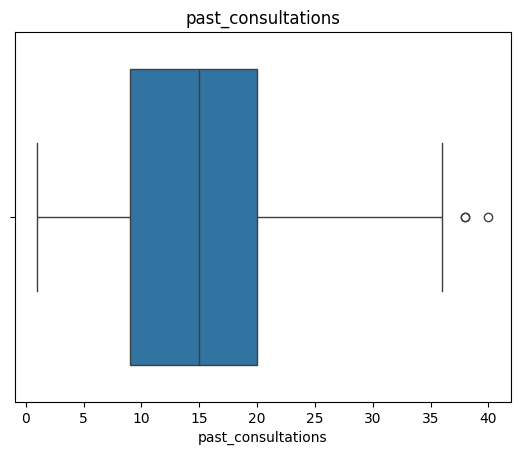

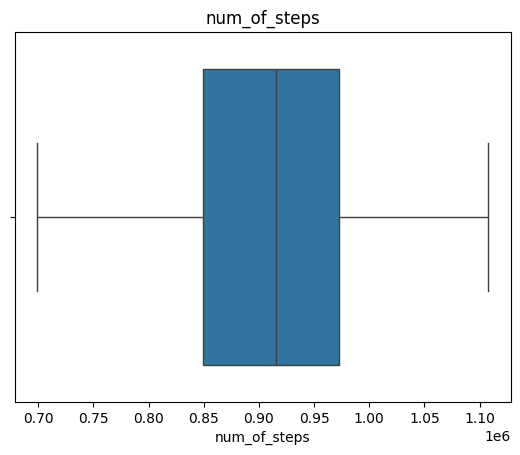

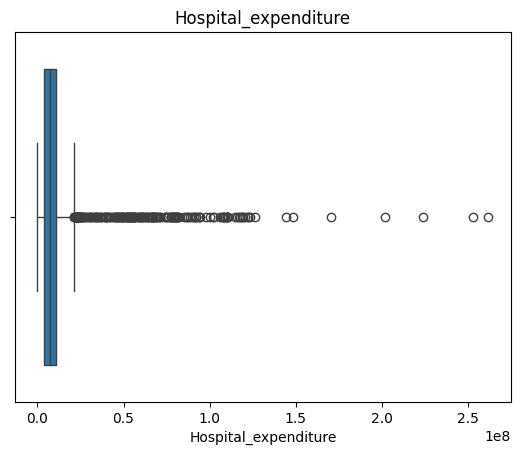

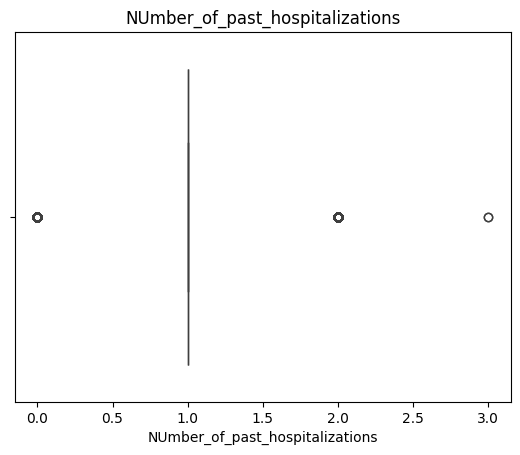

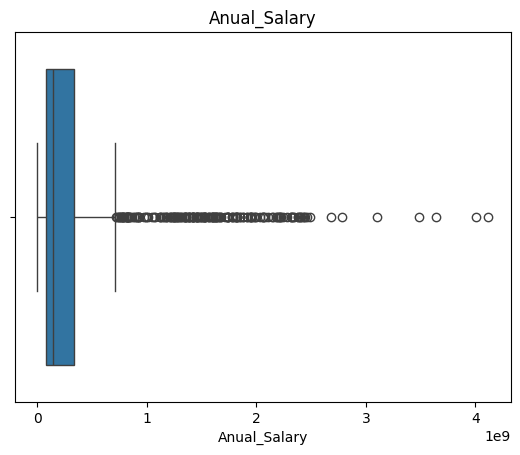

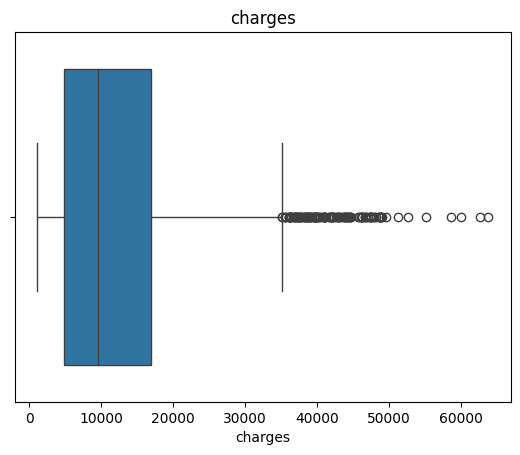

In [17]:
box_plot_data(data)

In [18]:
for col in out_lier_col:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3-q1
  upper_limit = q3 + (1.5*iqr)
  lower_limit = q1 - (1.5*iqr)
  data = data[(data[col]>=lower_limit) & (data[col]<=upper_limit)]


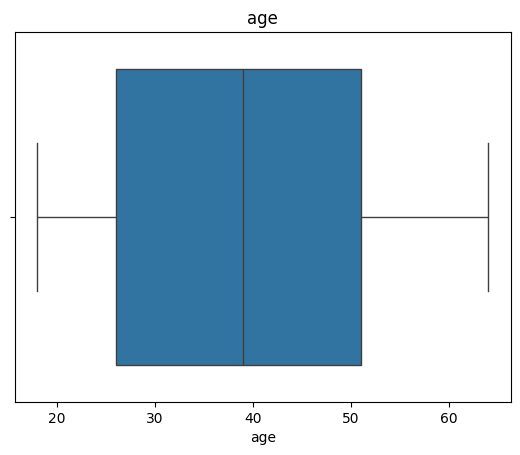

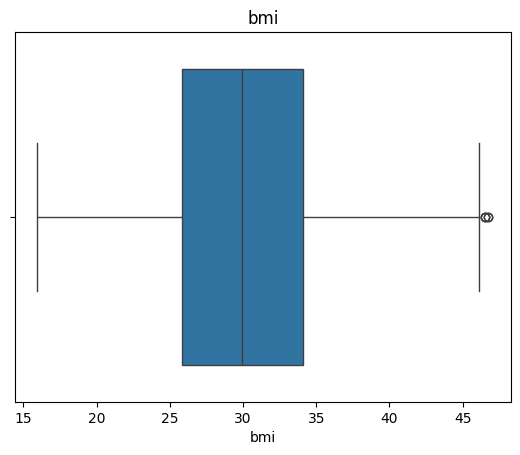

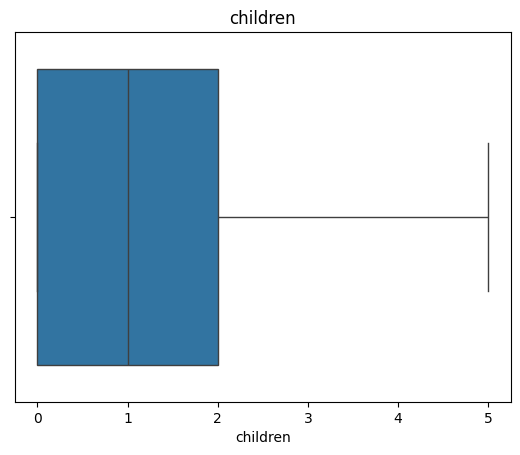

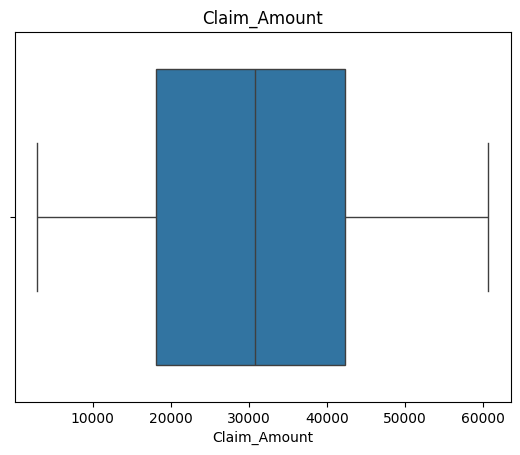

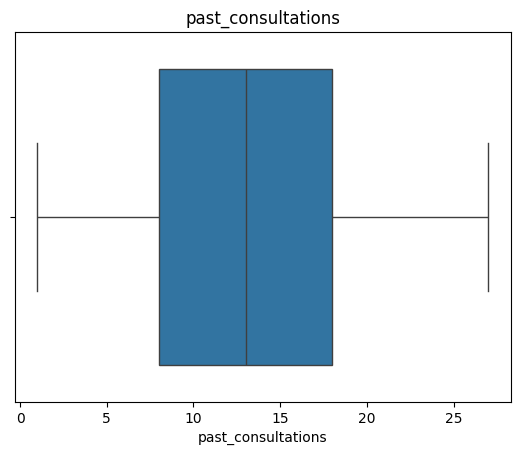

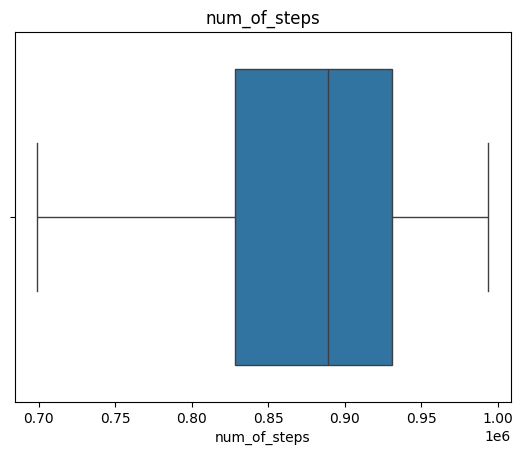

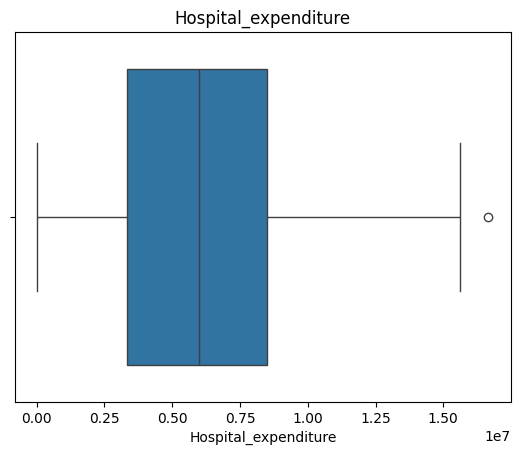

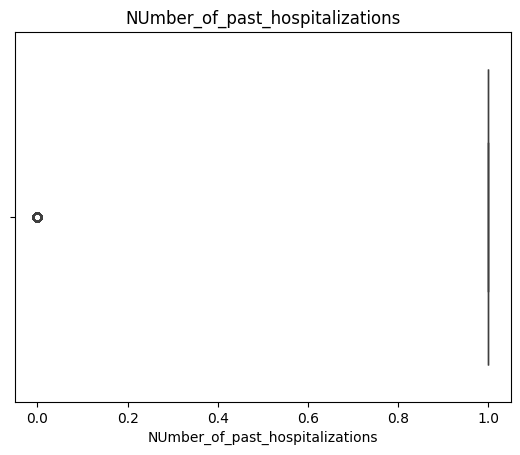

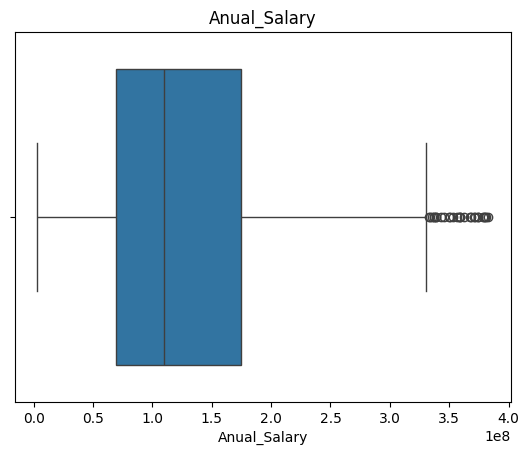

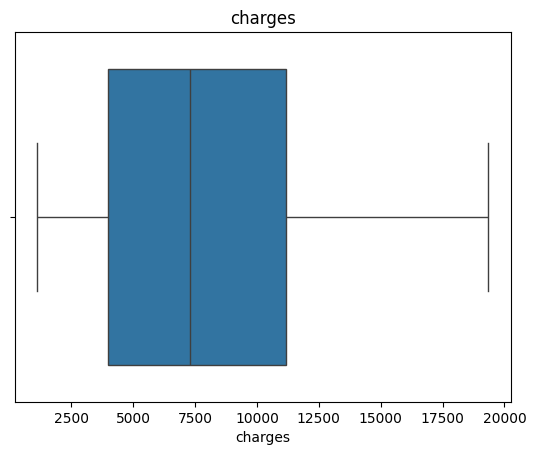

In [19]:
box_plot_data(data)

In [20]:
data['smoker'].nunique()

2

In [21]:
# prompt: how to find different values in a data frame

# Assuming 'data' is your DataFrame (as defined in the previous code)
for col in data.columns:
  print(f"Unique values in column '{col}':")
  print(data[col].unique())
  print("-" * 20)

Unique values in column 'age':
[18. 19. 21. 22. 20. 23. 24. 25. 26. 27. 28. 29. 31. 30. 33. 32. 34. 36.
 37. 35. 38. 40. 39. 41. 42. 43. 44. 46. 45. 48. 47. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.]
--------------------
Unique values in column 'sex':
['male' 'female']
--------------------
Unique values in column 'bmi':
[23.21  30.14  33.33  33.66  34.1   37.29  41.14  19.8   28.7   34.4
 35.4   31.1   35.53  36.85  20.79  26.73  17.48  31.13  31.35  20.425
 21.755 22.61  38.17  38.28  25.555 39.16  39.82  40.26  27.835 30.59
 26.84  33.77  15.96  21.47  22.99  23.085 23.75  25.46  26.125 23.32
 28.5   29.37  30.03  35.2   17.8   18.6   20.6   24.7   28.9   29.8
 32.9   40.5   29.735 32.56  20.9   24.6   41.91  28.4   29.6   31.46
 33.    33.3   28.975 31.255 36.86  22.    27.93  23.4   25.8   29.3
 32.01  40.47  35.86  34.6   34.87  39.49  25.175 32.11  26.03  22.3
 27.36  22.515 30.495 35.15  36.575 25.74  37.43  24.3   27.1   28.05
 36.    25.08  26.315 28.215

In [22]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [23]:
# prompt: convert object data to encoding

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in data.columns:
    # Check if the column's data type is 'object' (categorical)
    if data[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        data[col] = le.fit_transform(data[col])

# Print the updated DataFrame to verify the changes
print(data.head())

    age  sex    bmi  children  smoker  Claim_Amount  past_consultations  \
0  18.0    1  23.21       0.0       0   29087.54313                17.0   
1  18.0    1  30.14       0.0       0   39053.67437                 7.0   
2  18.0    1  33.33       0.0       0   39023.62759                19.0   
3  18.0    1  33.66       0.0       0   28185.39332                11.0   
4  18.0    1  34.10       0.0       0   14697.85941                16.0   

   num_of_steps  Hospital_expenditure  NUmber_of_past_hospitalizations  \
0      715428.0           4720920.992                              0.0   
1      699157.0           4329831.676                              0.0   
2      702341.0           6884860.774                              0.0   
3      700250.0           4274773.550                              0.0   
4      711584.0           3787293.921                              0.0   

   Anual_Salary  region    charges  
0   55784970.05       2  1121.8739  
1   13700885.19       2  1131.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])


In [25]:
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,2,1137.0110


In [26]:
data.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.003647,0.157363,0.046903,-0.205838,0.106907,0.178307,0.763756,0.161881,0.527364,0.508866,0.018011,0.682315
sex,-0.003647,1.000000,0.010777,0.022200,0.020767,-0.033575,0.001858,-0.058674,-0.004635,-0.082260,-0.025345,-0.017551,-0.039046
bmi,0.157363,0.010777,1.000000,0.012556,-0.203690,0.013019,0.017543,0.043881,0.013951,0.022507,0.007997,0.160247,0.019630
children,0.046903,0.022200,0.012556,1.000000,-0.028992,0.037777,0.043747,0.219064,-0.008496,0.309678,0.066027,0.049654,0.131216
smoker,-0.205838,0.020767,-0.203690,-0.028992,1.000000,0.144309,0.141036,0.297142,0.274776,0.084012,0.506264,-0.016182,0.435330
Claim_Amount,0.106907,-0.033575,0.013019,0.037777,0.144309,1.000000,0.070665,0.187298,0.050630,0.108704,0.169931,0.004817,0.194932
past_consultations,0.178307,0.001858,0.017543,0.043747,0.141036,0.070665,1.000000,0.265269,0.088732,0.135027,0.273144,0.022856,0.286770
num_of_steps,0.763756,-0.058674,0.043881,0.219064,0.297142,0.187298,0.265269,1.000000,0.309669,0.715836,0.794464,-0.044130,0.942969
Hospital_expenditure,0.161881,-0.004635,0.013951,-0.008496,0.274776,0.050630,0.088732,0.309669,1.000000,0.131773,0.378125,0.019383,0.366163
NUmber_of_past_hospitalizations,0.527364,-0.082260,0.022507,0.309678,0.084012,0.108704,0.135027,0.715836,0.131773,1.000000,0.373849,-0.049122,0.532328


<Axes: >

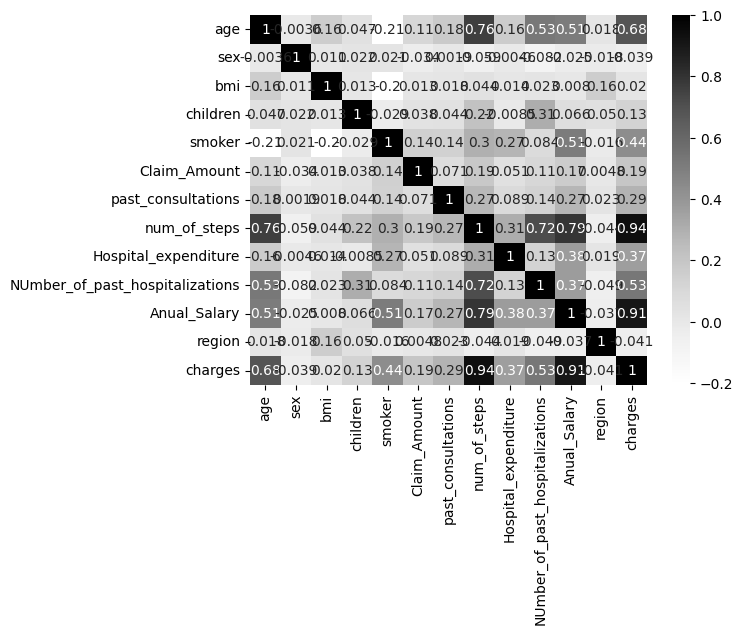

In [27]:
sns.heatmap(data.corr(),annot=True,cmap='Greys')

In [28]:
data.drop('Anual_Salary',inplace=True,axis=1)

In [29]:
data.drop('num_of_steps',inplace=True,axis=1)

In [30]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'region', 'charges'],
      dtype='object')

<Axes: >

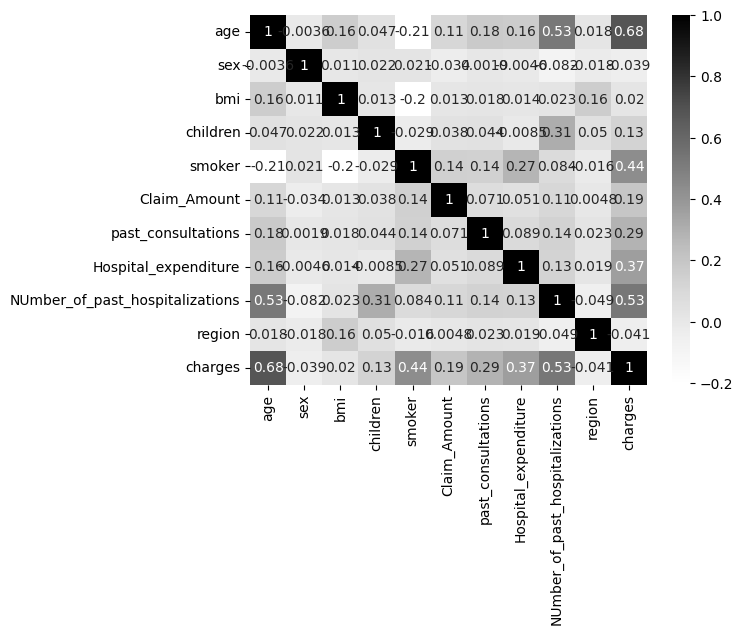

In [31]:
sns.heatmap(data.corr(),cmap='Greys',annot=True)

In [32]:
x=data.drop('charges',axis=1)
y=data['charges']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
x_train.count()

,0
age,690
sex,690
bmi,690
children,690
smoker,690
Claim_Amount,690
past_consultations,690
Hospital_expenditure,690
NUmber_of_past_hospitalizations,690
region,690


In [35]:
x_test.count()

,0
age,296
sex,296
bmi,296
children,296
smoker,296
Claim_Amount,296
past_consultations,296
Hospital_expenditure,296
NUmber_of_past_hospitalizations,296
region,296


In [36]:
y_train.count()

690

In [37]:
# Model building

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(x_test)

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2 = r2_score(y_test,y_pred)

In [47]:
r2

0.8887174162127575

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
